# H - Temporal

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [285]:
path = 'C:/Users/weijia/OneDrive - University Of Cambridge/BuildingPhysics/'

In [286]:
H_1250_data = pd.read_csv(path + 'Squirrel 1250 data.csv')
H_1206_data = pd.read_csv(path + 'Squirrel 1206 data.csv')

In [287]:
H_1250_data.drop(columns=['Type'],inplace=True)
H_1206_data.drop(columns=['Type'],inplace=True)

In [288]:
H_1250_proc = H_1250_data[H_1250_data!='Under'].dropna()
H_1206_proc = H_1206_data[H_1206_data!='Under'].dropna()

In [289]:
H_1250_channels = H_1250_proc.iloc[:,1:].columns
H_1206_channels = H_1206_proc.iloc[:,1:].columns
#H_1206_proc.head()
H_1250_proc.dtypes

Date/Time                      object
Top, in front of LR5           object
Mid-Height (Middle of room)    object
Mid-Height (Near Window)       object
Bottom (Middle of room)        object
Bottom (Near Window)           object
External                       object
dtype: object

In [290]:
H_1250_proc[H_1250_channels] = H_1250_proc[H_1250_channels].astype('float64')
#date_1250_x = pd.Series([dt.datetime.strptime(d, '%Y-%m-%d %H:%M') for d in H_1250_proc['Date/Time']])
date_1250_x = pd.Series([dt.datetime.strptime(d, '%Y-%m-%d %H:%M') for d in H_1250_proc['Date/Time']])

In [291]:
H_1206_proc[H_1206_channels] = H_1206_proc[H_1206_channels].astype('float64')
date_1206_x = pd.Series([dt.datetime.strptime(d, '%Y-%m-%d %H:%M') for d in H_1206_proc['Date/Time']])

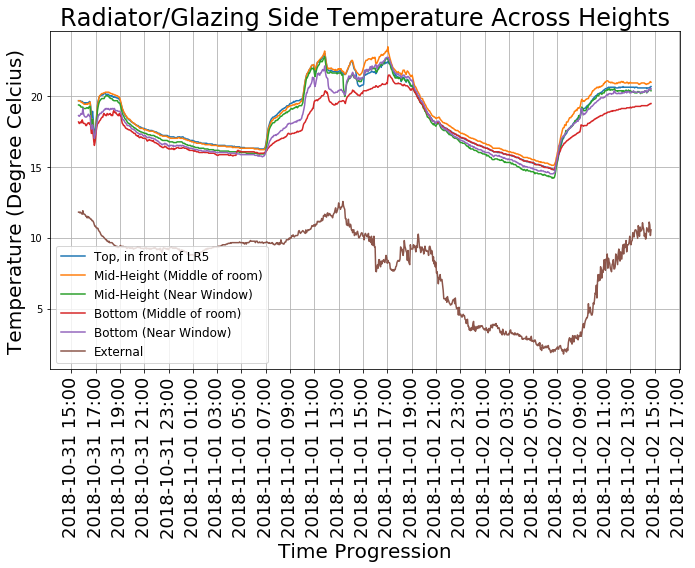

In [292]:
ax1 = plt.figure(figsize=(10,8)).add_subplot(111)
for col in H_1250_channels:
    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax1.plot_date(date_1250_x, H_1250_proc[col],fmt='-', xdate=True)

plt.xticks(rotation='vertical',fontsize=18)
plt.xlabel('Time Progression', fontsize=20)
plt.ylabel('Temperature (Degree Celcius)',fontsize=20)
plt.grid()
plt.legend(H_1250_channels, fontsize=12, loc=3)
plt.title('Radiator/Glazing Side Temperature Across Heights', fontsize=24)
plt.tight_layout()
plt.savefig('temp_distribution.png')


In [293]:
H_1250_proc['Date/Time'].describe()

,"Top, in front of LR5",Mid-Height (Middle of room),Mid-Height (Near Window),Bottom (Middle of room),Bottom (Near Window),External
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,18.558218,18.757582,18.265695,17.667073,18.098887,7.968081
std,2.170779,2.259342,2.286332,1.684171,2.171856,2.910761
min,14.750000,15.100000,14.200000,14.800000,14.500000,1.800000
25%,16.600000,16.650000,16.200000,16.150000,16.150000,5.500000
50%,18.250000,18.450000,18.050000,17.350000,17.750000,9.250000
75%,20.550000,20.900000,20.250000,19.050000,20.150000,9.750000
max,23.000000,23.450000,22.750000,21.450000,22.700000,12.550000


## Morning snap

In [294]:
morn = H_1250_proc[H_1250_proc['Date/Time'].str.contains('11-01 10:00')]
morn

,Date/Time,"Top, in front of LR5",Mid-Height (Middle of room),Mid-Height (Near Window),Bottom (Middle of room),Bottom (Near Window),External
368,2018-11-01 10:00,19.8,19.7,19.4,17.6,18.6,10.45


In [295]:
arvo = H_1250_proc[H_1250_proc['Date/Time'].str.contains('11-01 16:00')]
arvo;

In [296]:
night = H_1250_proc[H_1250_proc['Date/Time'].str.contains('11-02 1:00')]
night

,Date/Time,"Top, in front of LR5",Mid-Height (Middle of room),Mid-Height (Near Window),Bottom (Middle of room),Bottom (Near Window),External
668,2018-11-02 1:00,16.35,16.65,15.9,16.35,16.05,3.5


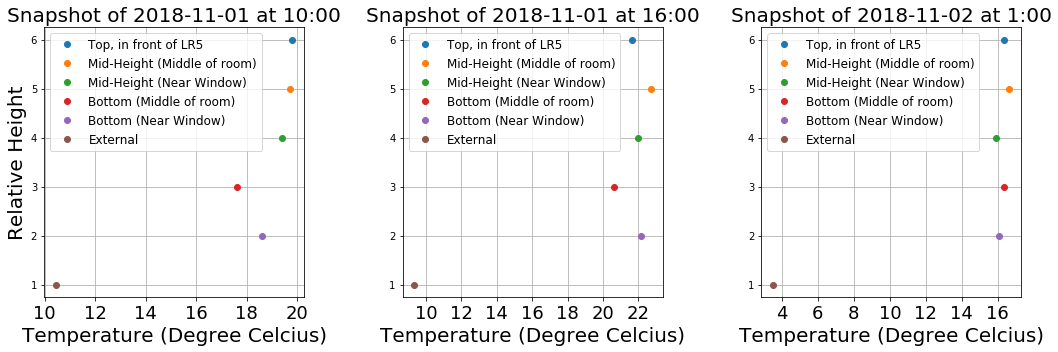

In [297]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131,frameon=True)
i=6
while i>0: 
    for col in morn.columns[1:]:
        ax1.plot(morn[col], i, 'o')
        i-=1
plt.title('Snapshot of 2018-11-01 at 10:00',fontsize=20)
plt.xticks(fontsize=18)
plt.legend(morn.columns[1:],fontsize=12)
plt.xlabel('Temperature (Degree Celcius)',fontsize=20)
plt.ylabel('Relative Height',fontsize=20)
plt.grid()
ax2=fig.add_subplot(132,frameon=True)
i=6
while i>0: 
    for col in arvo.columns[1:]:
        ax2.plot(arvo[col], i, 'o')
        i-=1
plt.title('Snapshot of 2018-11-01 at 16:00',fontsize=20)
plt.xticks(fontsize=18)
plt.legend(arvo.columns[1:],fontsize=12)
plt.xlabel('Temperature (Degree Celcius)',fontsize=20)
#plt.ylabel('Relative Height')
plt.grid()
ax3=fig.add_subplot(133,frameon=True)

i=6
while i>0: 
    for col in night.columns[1:]:
        ax3.plot(night[col], i, 'o')
        i-=1
plt.title('Snapshot of 2018-11-02 at 1:00',fontsize=20)
plt.xticks(fontsize=18)
plt.legend(night.columns[1:],fontsize=12)
plt.xlabel('Temperature (Degree Celcius)',fontsize=20)
#plt.ylabel('Relative Height')
plt.grid()
plt.tight_layout()
plt.savefig('temp_snapshots.png')


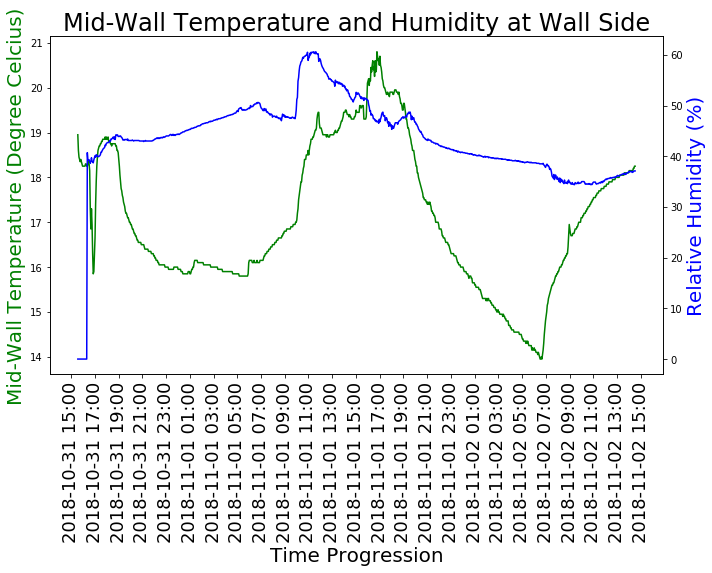

In [302]:
ax1 = plt.figure(figsize=(10, 8)).add_subplot(111)
plt.xticks(rotation=90, fontsize=18)
plt.xlabel('Time Progression',fontsize=20)
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

ax1.plot_date(date_1206_x, H_1206_proc['Wall, Mid-Height'],fmt='-', color='g')
ax2.plot_date(date_1206_x, H_1206_proc['Relative Humidity'],fmt='-', color='b')

ax1.set_ylabel('Mid-Wall Temperature (Degree Celcius)', color='g', fontsize=20)
ax2.set_ylabel('Relative Humidity (%)', color='b', fontsize=20)

plt.title('Mid-Wall Temperature and Humidity at Wall Side', fontsize=24)
plt.tight_layout()
plt.savefig(fname='midwall_humidity.png')

In [304]:
H_1250_proc.columns

Index(['Date/Time', 'Top, in front of LR5', 'Mid-Height (Middle of room)',
       'Mid-Height (Near Window)', 'Bottom (Middle of room)',
       'Bottom (Near Window)', 'External'],
      dtype='object')

In [380]:
mid_arvo = H_1250_proc[H_1250_proc['Date/Time'].str.contains('11-01 17:00')]
mid2_arvo = H_1206_proc[H_1206_proc['Date/Time'].str.contains('11-01 17:31')]
#mid_arvo.drop(columns=['Top, in front of LR5','Bottom (Middle of room)','Bottom (Near Window)','External'], inplace=True)
mid_arvo['Mid-Height (Opposite Wall)'] = 19.9
mid_arvo.drop(columns=['External'],inplace=True)

C:\Users\weijia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\weijia\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Top, in front of LR5           22.35
Mid-Height (Middle of room)    23.15
Mid-Height (Near Window)        22.6
Bottom (Middle of room)        20.85
Bottom (Near Window)            22.7
Mid-Height (Opposite Wall)      19.9
Name: 508, dtype: object

## Radiator vs Cold Wall Side: Mid-Wall

ValueError: Argument Z must be 2-dimensional.

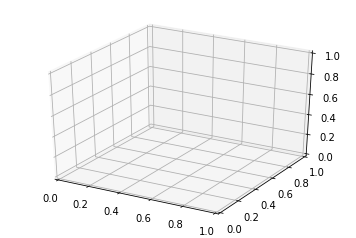

In [426]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plt.plot(2, mid_arvo['Top, in front of LR5'],'o')
# plt.plot(2, mid_arvo['Mid-Height (Middle of room)'],'o')
# plt.plot(1, mid_arvo['Mid-Height (Near Window)'],'o')
# plt.plot(1, mid_arvo['Bottom (Near Window)'],'o')
# plt.plot(3, mid2_arvo['Wall, Mid-Height'],'o')
xs = [2,2,1,2,1,3]
zs = [3,2,2,1,1,2]
ys = mid_arvo.iloc[0,1:]

ax.scatter(xs, ys, zs, c='r')
        
plt.title('Snapshot of 2018-11-01 at 17:00',fontsize=18)
ax.set_xticks([1,2,3])
ax.set_yticks(np.arange(20,25))
ax.set_zticks([1,2,3])
# plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
#plt.legend(['Top', 'Mid-height(Middle of Room)', 'Mid-Height (Near Window)','Bottom (Near Window)', 'Mid-height (Opposite Wall)'],fontsize=12)
ax.set_zlabel('Relative Height',fontsize=13)
ax.set_xlabel('Relative Distance from Radiator',fontsize=13)
ax.set_ylabel('Temperature (Degree Celsius)')
ax.view_init(20,60)
plt.tight_layout()

    
plt.savefig('horizontal.png')

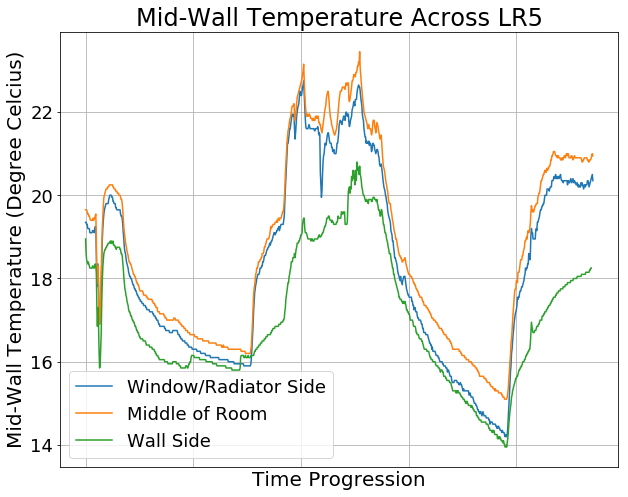

In [299]:
plt.figure(figsize=(10,8))
plt.plot(H_1250_proc['Mid-Height (Near Window)'])
plt.plot(H_1250_proc['Mid-Height (Middle of room)'])
plt.plot(H_1206_proc['Wall, Mid-Height'])

plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.ylabel('Mid-Wall Temperature (Degree Celcius)',fontsize=20)
plt.yticks(fontsize=18)
plt.xlabel('Time Progression',fontsize=20)
plt.legend(['Window/Radiator Side', 'Middle of Room', 'Wall Side'], fontsize=18)
plt.title('Mid-Wall Temperature Across LR5', fontsize=24)
plt.grid()
plt.savefig(fname='Mid_Wall_Across_Room.png')

In [300]:
H_1250_proc['Bottom (Middle of room)'].describe()

count    943.000000
mean      17.667073
std        1.684171
min       14.800000
25%       16.150000
50%       17.350000
75%       19.050000
max       21.450000
Name: Bottom (Middle of room), dtype: float64